# **Import Dataset**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
train=pd.read_csv('train.csv')

In [5]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
train.shape

(8523, 12)

In [8]:
test=pd.read_csv('test.csv')

In [9]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [10]:
test.shape

(5681, 11)

In [11]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [13]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# **Data Exploration**

In [14]:
train.Item_Fat_Content.value_counts()  #need to optimize

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [15]:
train.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [16]:
train.Outlet_Identifier.value_counts()

OUT027    935
OUT013    932
OUT035    930
OUT049    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [17]:
train.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [18]:
train.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [19]:
train.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [20]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


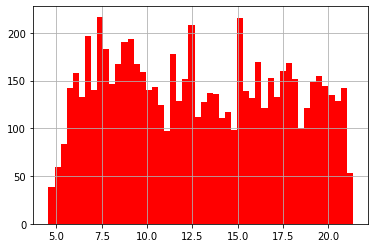

In [21]:
train.Item_Weight.hist(bins=50,color='red')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Item_Outlet_Sales Distribution')

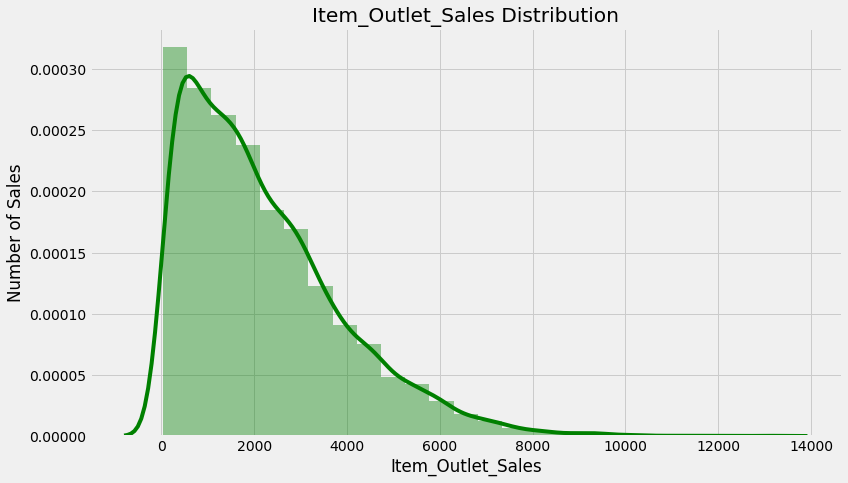

In [22]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(train.Item_Outlet_Sales, color="green", bins = 25)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,1))
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Number of Sales")
plt.title("Item_Outlet_Sales Distribution")

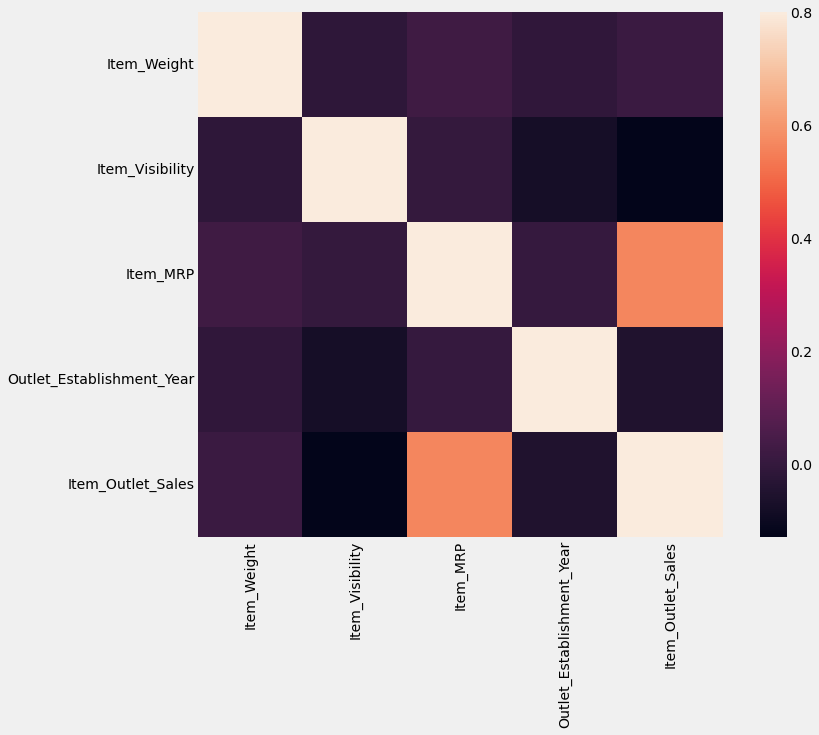

In [23]:
#correlation matrix
correl=train.corr()
ax=plt.subplots(figsize=(12,9))
sns.heatmap(correl,vmax=0.8,square=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


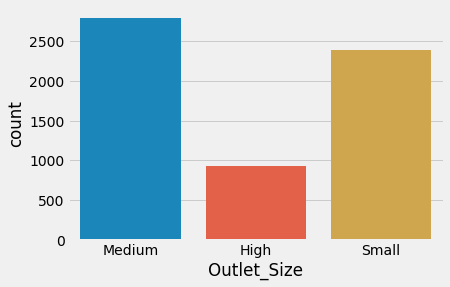

In [24]:
#Distribution of outlet size.
sns.countplot(train.Outlet_Size)

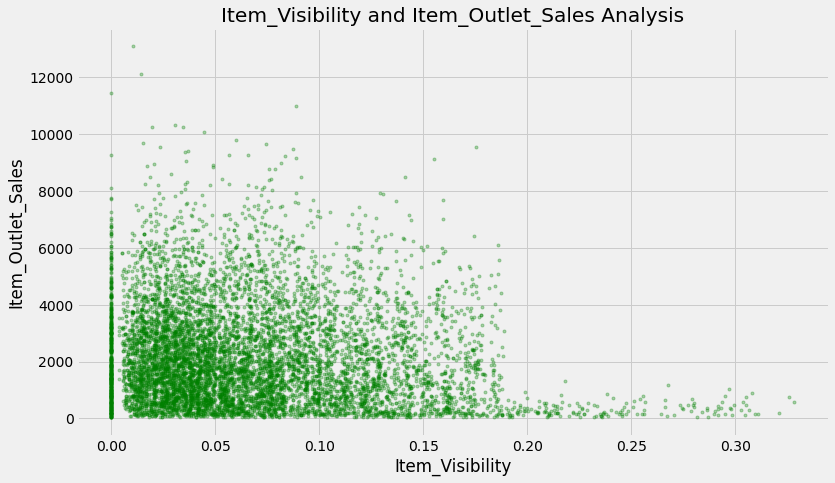

In [25]:
#Impact of item visibility on target variable item outlet sale
plt.figure(figsize=(12,7))
plt.xlabel("Item_Visibility")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Visibility and Item_Outlet_Sales Analysis")
plt.plot(train.Item_Visibility,train["Item_Outlet_Sales"],'.',color='green',alpha = 0.3)

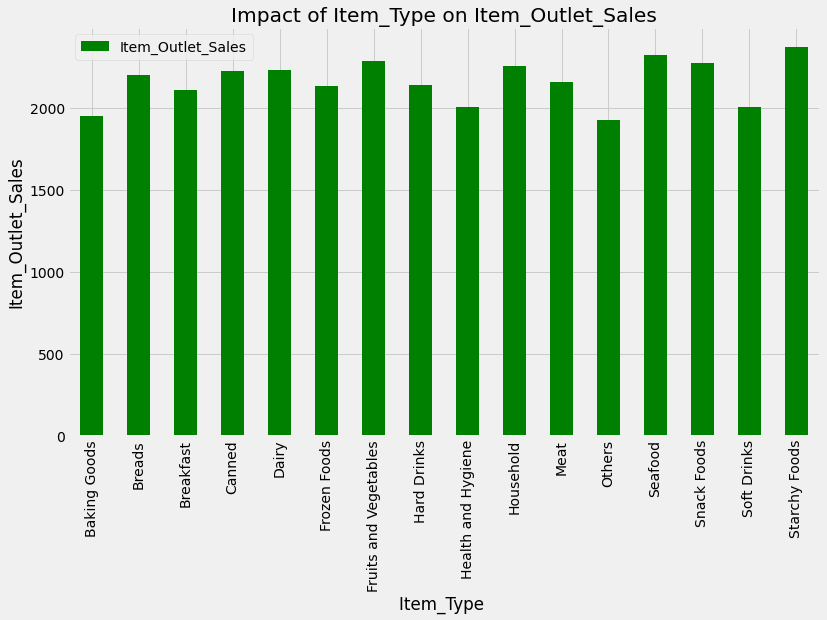

In [26]:
#Impact of item type on target variable item outlet sale
pivoTable = train.pivot_table(index='Item_Type', values="Item_Outlet_Sales", aggfunc=np.mean)
pivoTable.plot(kind='bar', color='green',figsize=(12,7))
plt.xlabel("Item_Type ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Type on Item_Outlet_Sales")
plt.xticks(rotation=90)
plt.show()

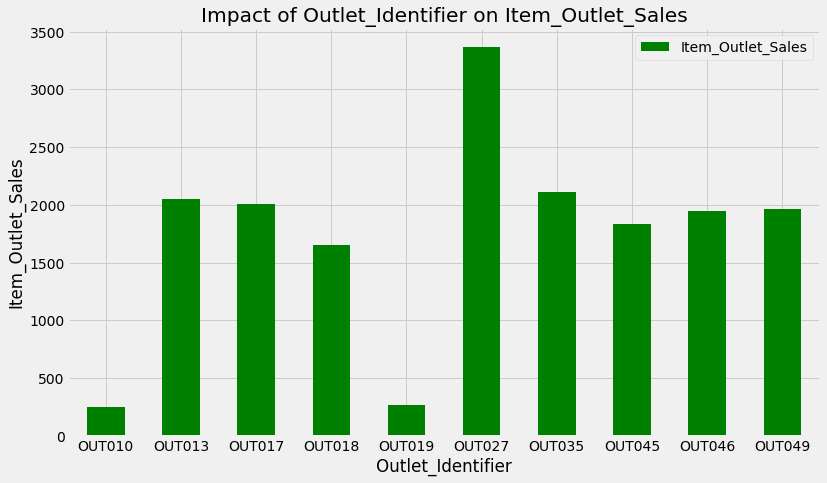

In [27]:
#Impact of outlet identifier on target variable item outlet sale.
Outlet_Identifier_pivot = train.pivot_table(index='Outlet_Identifier', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Identifier_pivot.plot(kind='bar',color='green',figsize=(12,7))
plt.xlabel("Outlet_Identifier")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Identifier on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

# **Data Cleaning**

In [28]:
#looking for missing values
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [29]:
Item_Sales=train.Item_Outlet_Sales

In [30]:
data=train.append(test)

In [31]:
print(train.shape, test.shape, data.shape)

(8523, 12) (5681, 11) (14204, 12)


In [32]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [33]:
data.apply(lambda x:len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
dtype: int64

In [34]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [35]:
data.dtypes.index

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [36]:
categorical_columns=[x for x in data.dtypes.index if data.dtypes[x]=='object']
categorical_columns

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [37]:
categorical_columns=[x for x in categorical_columns if x not in ['Item_Identifier','Outlet_Identifier']]
categorical_columns

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [38]:
#print frequencies of these categories
for col in categorical_columns:
    print('\nfrequency of categories for variable')
    print(data[col].value_counts())


frequency of categories for variable
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

frequency of categories for variable
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

frequency of categories for variable
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

frequency of categories for variable
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

frequency of categories for variable
Supermarket Type1   

In [39]:
data.Item_Weight.fillna(data.Item_Weight.mean(),inplace=True)

In [40]:
#imputing Outlet_Size missing values with the mode
#import mode function
from scipy.stats import mode

#determining the mode of each 
data.Outlet_Size=data.Outlet_Size.map({'Small':0,'Medium':1,'High':2})
outlet_size_mode = data.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x:mode(x).mode[0]) )
miss_bool = data['Outlet_Size'].isnull() 
data.loc[miss_bool,'Outlet_Size'] = data.loc[miss_bool,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [41]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [42]:
for i in data.dtypes.index:
    if len(data[i].value_counts())<30:
        print(i,"\n",data[i].value_counts())

Item_Fat_Content 
 Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
Item_Type 
 Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64
Outlet_Identifier 
 OUT027    1559
OUT013    1553
OUT035    1550
OUT046    1550
OUT049    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64
Outlet_Establishment_Year 
 1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
19

# **Feature Engineering**

In [43]:
#should we combine Outlet_Type?
data.pivot_table(index='Outlet_Type',values='Item_Outlet_Sales')

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.828500
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Supermarket Type3,3694.038558


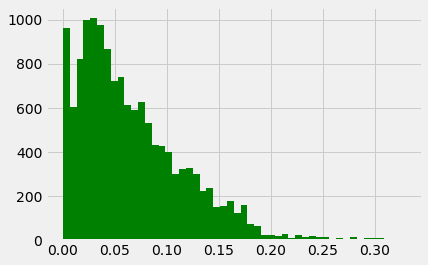

In [44]:
#item_Visibility minimum value is 0
data.Item_Visibility.hist(bins=50,color='green')

In [45]:
data.Item_Visibility.mean()

0.06595278007399345

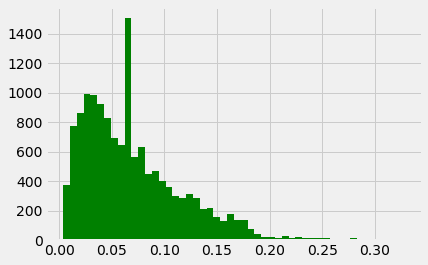

In [46]:
#fix the problem
data.loc[data['Item_Visibility']==0,'Item_Visibility']=data.Item_Visibility.mean()
data.Item_Visibility.hist(bins=50,color='green')

In [47]:
#determine the years of operation of a store
data['Outlet_Years']=2013-data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

In [48]:
#create a broad category of Item_Type
data.Item_Type.value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [49]:
data['Item_Type_Combined']=data.Item_Identifier.apply(lambda x:x[0:2])
data['Item_Type_Combined'].value_counts()

FD    10201
NC     2686
DR     1317
Name: Item_Type_Combined, dtype: int64

In [50]:
data['Item_Type_Combined']=data.Item_Type_Combined.map({'FD':'Food and Drinks','NC':'Non-Consumable','DR':'Drinks'})

In [51]:
data['Item_Type_Combined'].value_counts()

Food and Drinks    10201
Non-Consumable      2686
Drinks              1317
Name: Item_Type_Combined, dtype: int64

In [52]:
#modify categories of Item_Fat_Content
data.Item_Fat_Content.value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [53]:
data.Item_Fat_Content=data.Item_Fat_Content.replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
data.Item_Fat_Content.value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [54]:
data.loc[data['Item_Type_Combined']=='Non-Consumable','Item_Fat_Content']='Non-Edible'

In [55]:
data.Item_Fat_Content.value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [56]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years,Item_Type_Combined
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,1.0,Tier 1,Supermarket Type1,3735.1380,14,Food and Drinks
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,1.0,Tier 3,Supermarket Type2,443.4228,4,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,1.0,Tier 1,Supermarket Type1,2097.2700,14,Food and Drinks
3,FDX07,19.20,Regular,0.065953,Fruits and Vegetables,182.0950,OUT010,1998,0.0,Tier 3,Grocery Store,732.3800,15,Food and Drinks
4,NCD19,8.93,Non-Edible,0.065953,Household,53.8614,OUT013,1987,2.0,Tier 3,Supermarket Type1,994.7052,26,Non-Consumable


# **Exporting the Data**
Final step is to convert data back into train and test data sets.

In [57]:
#import library 
#now import labelEncoding
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
data['Outlet']=lb.fit_transform(data['Outlet_Identifier'])
var=['Item_Fat_Content','Outlet_Location_Type','Outlet_Type','Outlet_Size','Item_Type_Combined']
lb=LabelEncoder()
for item in var:
    data[item]=lb.fit_transform(data[item])

In [58]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years,Item_Type_Combined,Outlet
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380,14,1,9
1,DRC01,5.92,2,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228,4,0,3
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700,14,1,9
3,FDX07,19.20,2,0.065953,Fruits and Vegetables,182.0950,OUT010,1998,0,2,0,732.3800,15,1,0
4,NCD19,8.93,1,0.065953,Household,53.8614,OUT013,1987,2,2,1,994.7052,26,2,1


In [59]:
data.drop(['Outlet_Establishment_Year','Item_Type'],inplace=True,axis=1)

In [60]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years,Item_Type_Combined,Outlet
0,FDA15,9.30,0,0.016047,249.8092,OUT049,1,0,1,3735.1380,14,1,9
1,DRC01,5.92,2,0.019278,48.2692,OUT018,1,2,2,443.4228,4,0,3
2,FDN15,17.50,0,0.016760,141.6180,OUT049,1,0,1,2097.2700,14,1,9
3,FDX07,19.20,2,0.065953,182.0950,OUT010,0,2,0,732.3800,15,1,0
4,NCD19,8.93,1,0.065953,53.8614,OUT013,2,2,1,994.7052,26,2,1


In [61]:
Item_Sales=data.Item_Outlet_Sales

In [62]:
train=data.iloc[:8523,:]
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years,Item_Type_Combined,Outlet
0,FDA15,9.30,0,0.016047,249.8092,OUT049,1,0,1,3735.1380,14,1,9
1,DRC01,5.92,2,0.019278,48.2692,OUT018,1,2,2,443.4228,4,0,3
2,FDN15,17.50,0,0.016760,141.6180,OUT049,1,0,1,2097.2700,14,1,9
3,FDX07,19.20,2,0.065953,182.0950,OUT010,0,2,0,732.3800,15,1,0
4,NCD19,8.93,1,0.065953,53.8614,OUT013,2,2,1,994.7052,26,2,1


In [63]:
test=data.iloc[8523:,:]

In [64]:
test.drop('Item_Outlet_Sales',inplace=True,axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [65]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Years,Item_Type_Combined,Outlet
0,FDW58,20.750000,0,0.007565,107.8622,OUT049,1,0,1,14,1,9
1,FDW14,8.300000,2,0.038428,87.3198,OUT017,0,1,1,6,1,2
2,NCN55,14.600000,1,0.099575,241.7538,OUT010,0,2,0,15,2,0
3,FDQ58,7.315000,0,0.015388,155.0340,OUT017,0,1,1,6,1,2
4,FDY38,12.792854,2,0.118599,234.2300,OUT027,1,2,3,28,1,5


# **Model Building**

In [70]:
#Define target and ID columns:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']
from google.colab import files
from sklearn import model_selection, metrics
def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
  #Fit the algorithm on the data
  alg.fit(dtrain[predictors], dtrain[target])
       
  #Predict training set:
  dtrain_predictions = alg.predict(dtrain[predictors])
    
  #Remember the target had been normalized
  Sq_train = (dtrain[target])
  #Perform cross-validation:
  cv_score = model_selection.cross_val_score(alg, dtrain[predictors],Sq_train , cv=20, scoring='neg_mean_squared_error')
  cv_score = np.sqrt(np.abs(cv_score))
    
  #Print model report:
  RMSE = np.sqrt(metrics.mean_squared_error(Sq_train.values, dtrain_predictions))
  print("RMSE : %.4g" % RMSE)
  print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
  #Predict on testing data:
  dtest[target] = alg.predict(dtest[predictors])
    
  #Export submission file:
  IDcol.append(target)
  submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
  submission.to_csv(filename,index=False)

  return RMSE

Linear Regression
RMSE : 1202
CV Score : Mean - 1203 | Std - 41.54 | Min - 1153 | Max - 1282


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

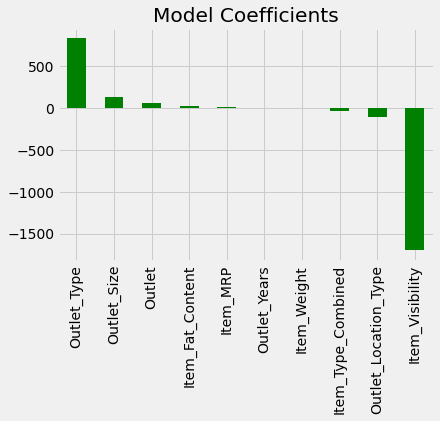

In [71]:
#Linear Regression Model
from sklearn.linear_model import LinearRegression
LR = LinearRegression(normalize=True)
predictors = train.columns.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'])
print("Linear Regression")
LR_RMSE=modelfit(LR, train, test, predictors, target, IDcol, 'LR.csv')

coef = pd.Series(LR.coef_, predictors).sort_values(ascending=False)
coef.plot(kind='bar',color='green',title='Model Coefficients')

files.download('LR.csv')

Ridge Regression
RMSE : 1204
CV Score : Mean - 1204 | Std - 42.83 | Min - 1151 | Max - 1288


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

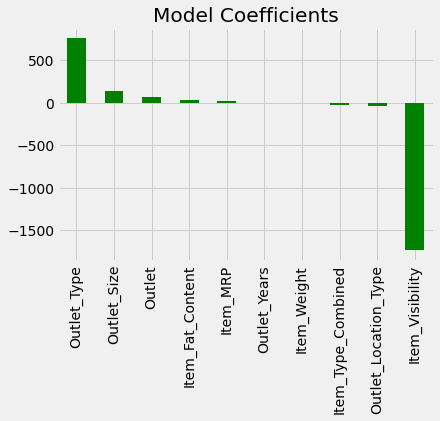

In [72]:
#Ridge Regression Model
from sklearn.linear_model import Ridge
RR = Ridge(alpha=0.05,normalize=True)
print("Ridge Regression")
RR_RMSE=modelfit(RR, train, test, predictors, target, IDcol, 'RR.csv')

coef = pd.Series(RR.coef_, predictors).sort_values(ascending=False)
coef.plot(kind='bar',color='green',title='Model Coefficients')

files.download('RR.csv')

Decision Tree
RMSE : 1059
CV Score : Mean - 1093 | Std - 45.41 | Min - 1012 | Max - 1182


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

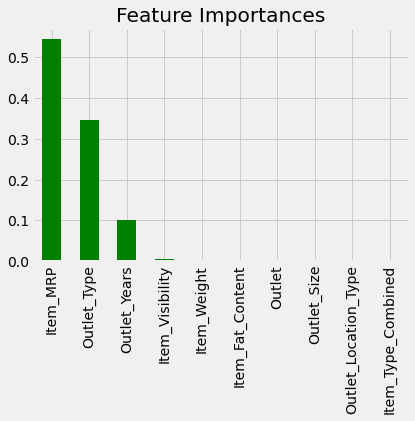

In [73]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
print('Decision Tree')
DT_RMSE=modelfit(DT, train, test, predictors, target, IDcol, 'DT.csv')

coef = pd.Series(DT.feature_importances_, predictors).sort_values(ascending=False)
coef.plot(kind='bar',color='green',title='Feature Importances')

files.download('DT.csv')

Random Forrest
RMSE : 1069
CV Score : Mean - 1098 | Std - 43.52 | Min - 1033 | Max - 1184


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

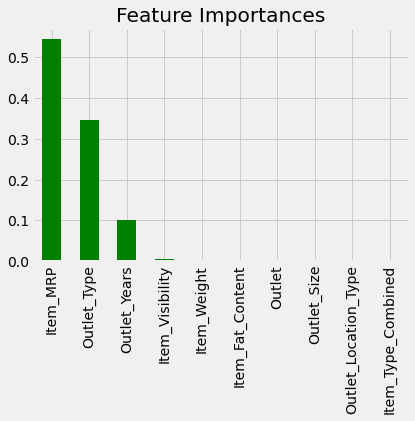

In [74]:
#Random Forrest Model
RF = DecisionTreeRegressor(max_depth=8, min_samples_leaf=150)
print('Random Forrest')
RF_RMSE=modelfit(RF, train, test, predictors, target, IDcol, 'RF.csv')

coef = pd.Series(DT.feature_importances_, predictors).sort_values(ascending=False)
coef.plot(kind='bar',color='green',title='Feature Importances')

files.download('RF.csv')

In [75]:
#Xgboost
from xgboost import XGBRegressor
XG = XGBRegressor(n_estimators=1000, learning_rate=0.05)
XG.fit(train[predictors], train[target], early_stopping_rounds=5, eval_set=[(test[predictors], test[target])], verbose=False)

[05:31:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

XGBoost
MAE : 128.28057848690466
RMSE : 1057


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

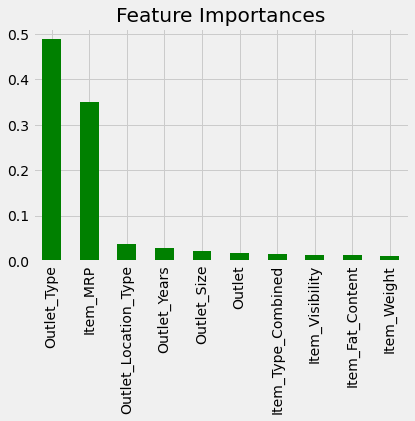

In [76]:
#Predict training set:
train_predictions = XG.predict(train[predictors])
# make predictions
predictions = XG.predict(test[predictors])
from sklearn.metrics import mean_absolute_error
print('XGBoost')
print("MAE : " + str(mean_absolute_error(predictions, test[target])))
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error((train[target]).values, train_predictions)))
XG_RMSE = np.sqrt(metrics.mean_squared_error((train[target]).values, train_predictions))
IDcol.append(target)
submission = pd.DataFrame({ x: test[x] for x in IDcol})
submission.to_csv("XG.csv", index=False)

coef = pd.Series(XG.feature_importances_, predictors).sort_values(ascending=False)
coef.plot(kind='bar',color='green',title='Feature Importances')

files.download('XG.csv')

In [77]:
print("Model\t\t\t RMSE")
print("Linear Regression\t %.4g" % LR_RMSE)
print("Ridge Regression\t %.4g" % RR_RMSE)
print("Decision Tree\t\t %.4g" % DT_RMSE)
print("Random Forest\t\t %.4g" % RF_RMSE)
print("XGBoost\t\t\t %.4g" % XG_RMSE)

Model			 RMSE
Linear Regression	 1202
Ridge Regression	 1204
Decision Tree		 1059
Random Forest		 1069
XGBoost			 1057
